<>:52: SyntaxWarning: invalid escape sequence '\C'
<>:54: SyntaxWarning: invalid escape sequence '\C'
<>:55: SyntaxWarning: invalid escape sequence '\C'
<>:52: SyntaxWarning: invalid escape sequence '\C'
<>:54: SyntaxWarning: invalid escape sequence '\C'
<>:55: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leevi\AppData\Local\Temp\ipykernel_16960\4109958409.py:52: SyntaxWarning: invalid escape sequence '\C'
  plot_images_from_folder('DAPlankton_subset\CS\Apocalathium_malmogiense', n=10, rows=2, main_title="Apocalathium_malmogiense")
C:\Users\Leevi\AppData\Local\Temp\ipykernel_16960\4109958409.py:54: SyntaxWarning: invalid escape sequence '\C'
  plot_images_from_folder('DAPlankton_subset\CS\Kryptoperidium_foliaceum', n=10, rows=2, main_title="Kryptoperidium_foliaceum")
C:\Users\Leevi\AppData\Local\Temp\ipykernel_16960\4109958409.py:55: SyntaxWarning: invalid escape sequence '\C'
  plot_images_from_folder('DAPlankton_subset\CS\Levanderina_fissa', n=10, rows=2, main_title="Levander

hello world


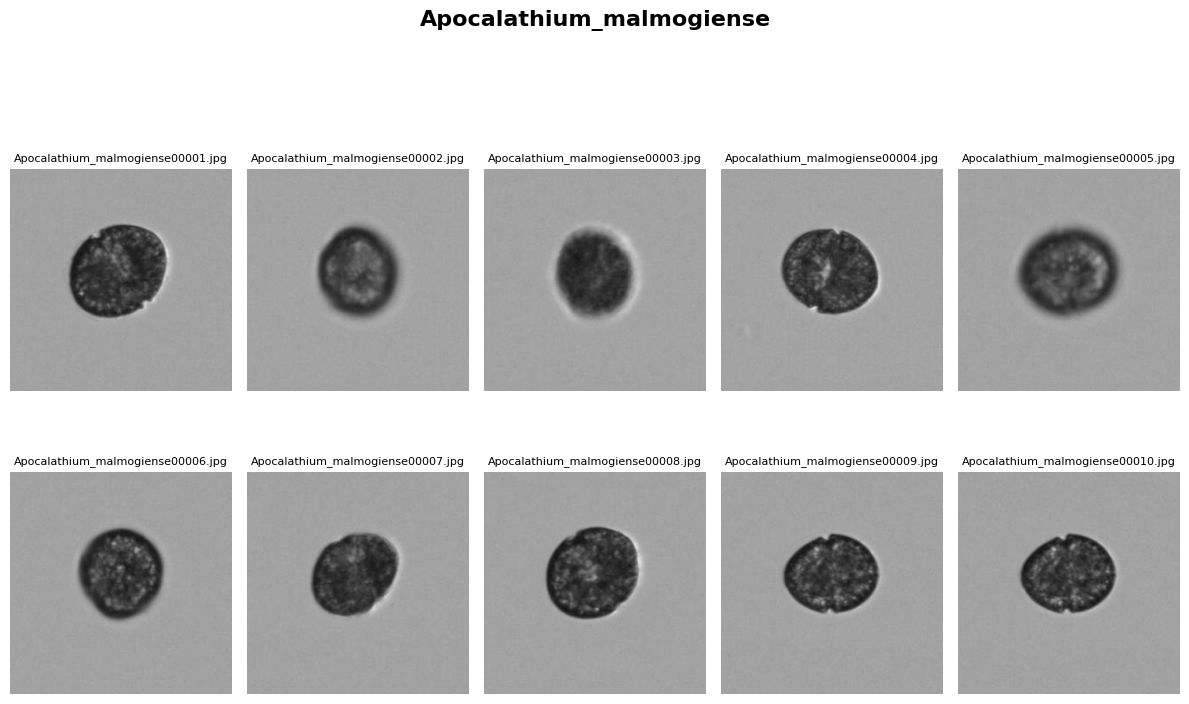

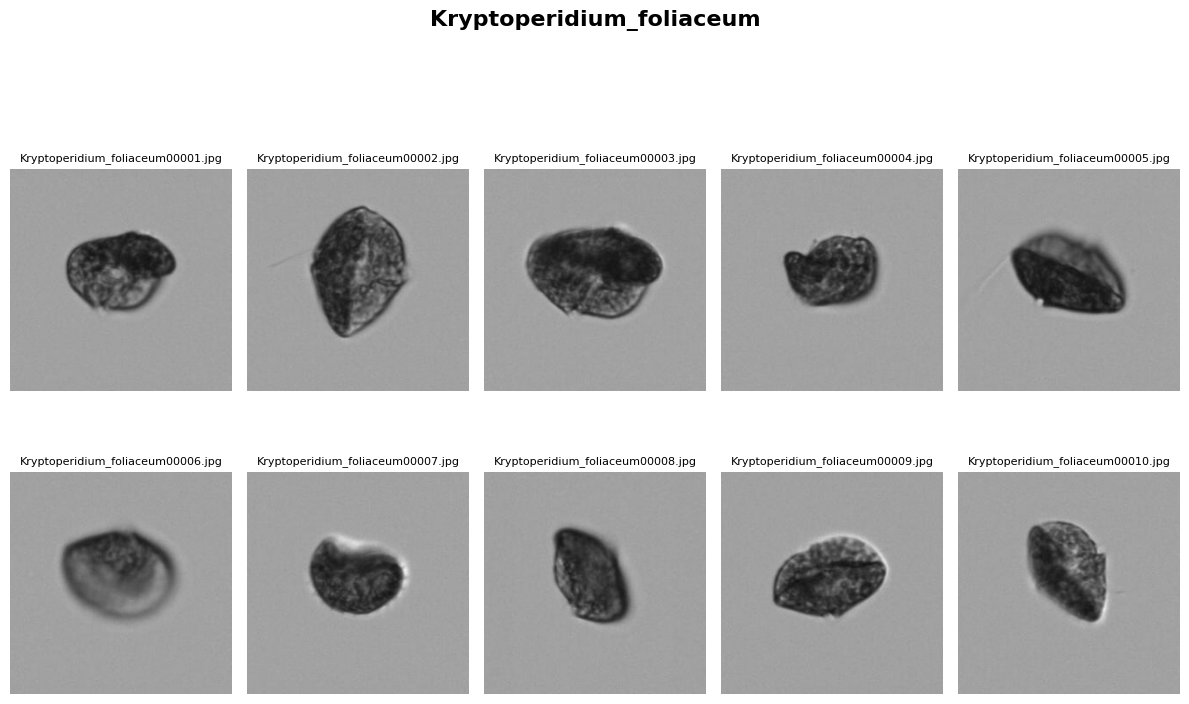

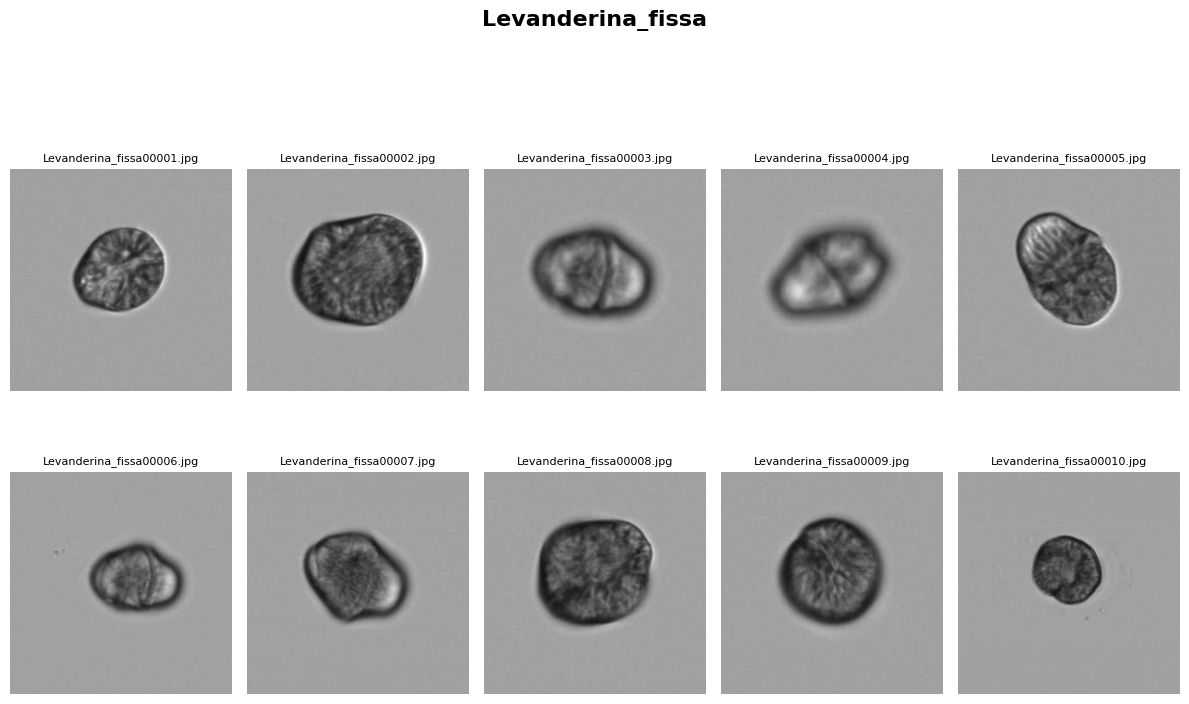

In [ ]:
print("hello world")


import cv2
import matplotlib.pyplot as plt
import os

# Function to plot the first N images from a folder in a grid (ChatGPT et al.)

def plot_images_from_folder(folder_path, n=10, rows=1, figsize=(12, 8), main_title="Image Grid"):
    """
    Plot the first N images from a folder with a main title.

    Parameters:
    - folder_path: Path to the folder containing images
    - n: Number of images to display (default 10)
    - rows: Number of rows in the grid (default 1)
    - figsize: Size of the figure (default (12, 8))
    - main_title: Title for the whole figure (default "Image Grid")
    """
    # Get the first N image file paths (supports common image formats)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    image_files = image_files[:n]
    
    if not image_files:
        print("❌ No images found in the folder.")
        return

    cols = (len(image_files) + rows - 1) // rows  # Auto-calculate columns
    plt.figure(figsize=figsize)

    # Set the main title for the whole grid
    plt.suptitle(main_title, fontsize=16, weight='bold')

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        # Load and convert image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(image_file, fontsize=8)  # Display filename as title
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
    plt.show()


# Example usage
plot_images_from_folder('DAPlankton_subset\CS\Apocalathium_malmogiense', n=10, rows=2, main_title="Apocalathium_malmogiense")
plot_images_from_folder('DAPlankton_subset\CS\Kryptoperidium_foliaceum', n=10, rows=2, main_title="Kryptoperidium_foliaceum")
plot_images_from_folder('DAPlankton_subset\CS\Levanderina_fissa', n=10, rows=2, main_title="Levanderina_fissa")


In [6]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Load dataset from folder structure
data_dir = 'DAPlankton_subset\\CS'
train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Number of classes
num_classes = 3

# Load pre-trained ResNet-18 model
model = timm.create_model('resnet18', pretrained=True)

# Modify classifier for your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

train(model, train_loader, criterion, optimizer)


<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:15: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leevi\AppData\Local\Temp\ipykernel_16960\1544461916.py:15: SyntaxWarning: invalid escape sequence '\C'
  data_dir = 'DAPlankton_subset\CS'
C:\Users\Leevi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Leevi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Leevi\.cache\huggingface\hub\models--timm--resnet18.a1_in1k. Caching fi

Epoch [1/10], Loss: 0.7699
Epoch [2/10], Loss: 0.2166
Epoch [3/10], Loss: 0.0769
Epoch [4/10], Loss: 0.0480
Epoch [5/10], Loss: 0.0290
Epoch [6/10], Loss: 0.0238
Epoch [7/10], Loss: 0.0162
Epoch [8/10], Loss: 0.0245
Epoch [9/10], Loss: 0.0152
Epoch [10/10], Loss: 0.0078


In [7]:
## Testing the model
import numpy as np

torch.save(model.state_dict(), 'first_iteration.pth')

Epoch [1/10], Loss: 0.9792, Accuracy: 72.71%
Epoch [2/10], Loss: 0.7205, Accuracy: 89.86%
Epoch [3/10], Loss: 0.4481, Accuracy: 95.15%
Epoch [4/10], Loss: 0.2611, Accuracy: 96.76%
Epoch [5/10], Loss: 0.1551, Accuracy: 98.17%
Epoch [6/10], Loss: 0.1006, Accuracy: 98.60%
Epoch [7/10], Loss: 0.0934, Accuracy: 98.60%
Epoch [8/10], Loss: 0.0630, Accuracy: 99.03%
Epoch [9/10], Loss: 0.0597, Accuracy: 98.92%
Epoch [10/10], Loss: 0.0354, Accuracy: 99.89%


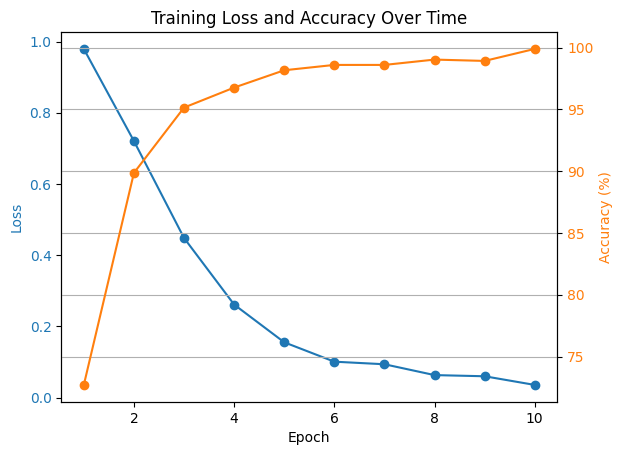

In [ ]:
import timm
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Parameters
data_dir = 'DAPlankton_subset\\CS'
train_size = 0.3  # Percentage of data for training
test_size = 0.1   # Percentage of data for testing

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Load dataset from folder structure
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into training and test sets
train_len = int(len(dataset) * train_size)
test_len = len(dataset) - train_len
train_dataset, test_dataset = random_split(dataset, [train_len, test_len])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Number of classes
num_classes = 3

# Load pre-trained ResNet-18 model
model = timm.create_model('resnet18', pretrained=True)

# Modify classifier for your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop with loss and accuracy visualization
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    losses = []
    accuracies = []  # List to store accuracy for each epoch

    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        total_samples = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_samples * 100  # Accuracy in percentage
        losses.append(avg_loss)
        accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Plot training loss
    fig, ax1 = plt.subplots()

    ax1.plot(range(1, epochs + 1), losses, marker='o', color='tab:blue')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(range(1, epochs + 1), accuracies, marker='o', color='tab:orange')
    ax2.set_ylabel('Accuracy (%)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title('Training Loss and Accuracy Over Time')
    plt.grid(True)
    plt.show()

train(model, train_loader, criterion, optimizer)

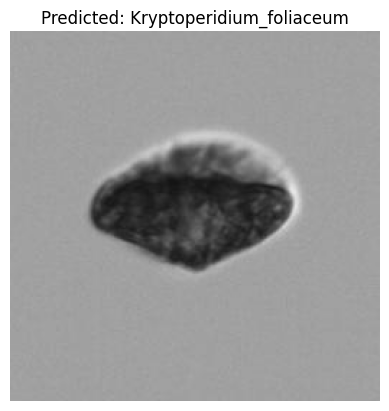

Predicted class: Kryptoperidium_foliaceum
Image path: DAPlankton_subset\CS\Kryptoperidium_foliaceum\Kryptoperidium_foliaceum00826.jpg


In [12]:
## Testing the model by selecting a random image from the image folders
import random
from PIL import Image
import os

# Function to randomly select an image and predict its category
def predict_random_image(model, data_dir, device):
    # Get all image paths from the dataset
    class_names = os.listdir(data_dir)  # Folder names are the class labels
    all_images = []

    # Iterate over each class folder and collect image paths
    for class_name in class_names:
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            images = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith(('jpg', 'png', 'jpeg'))]
            all_images.extend(images)

    # Randomly choose an image
    random_image_path = random.choice(all_images)
    image = Image.open(random_image_path).convert("RGB")

    # Transform the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Predict the category using the trained model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class_idx = torch.max(output, 1)

    # Get the predicted class name
    predicted_class = class_names[predicted_class_idx.item()]

    # Display the image and predicted class
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')  # Turn off axis
    plt.show()

    print(f"Predicted class: {predicted_class}")
    print(f"Image path: {random_image_path}")

# Usage example
predict_random_image(model, data_dir, device)

Total accuracy: 99.02957486136785


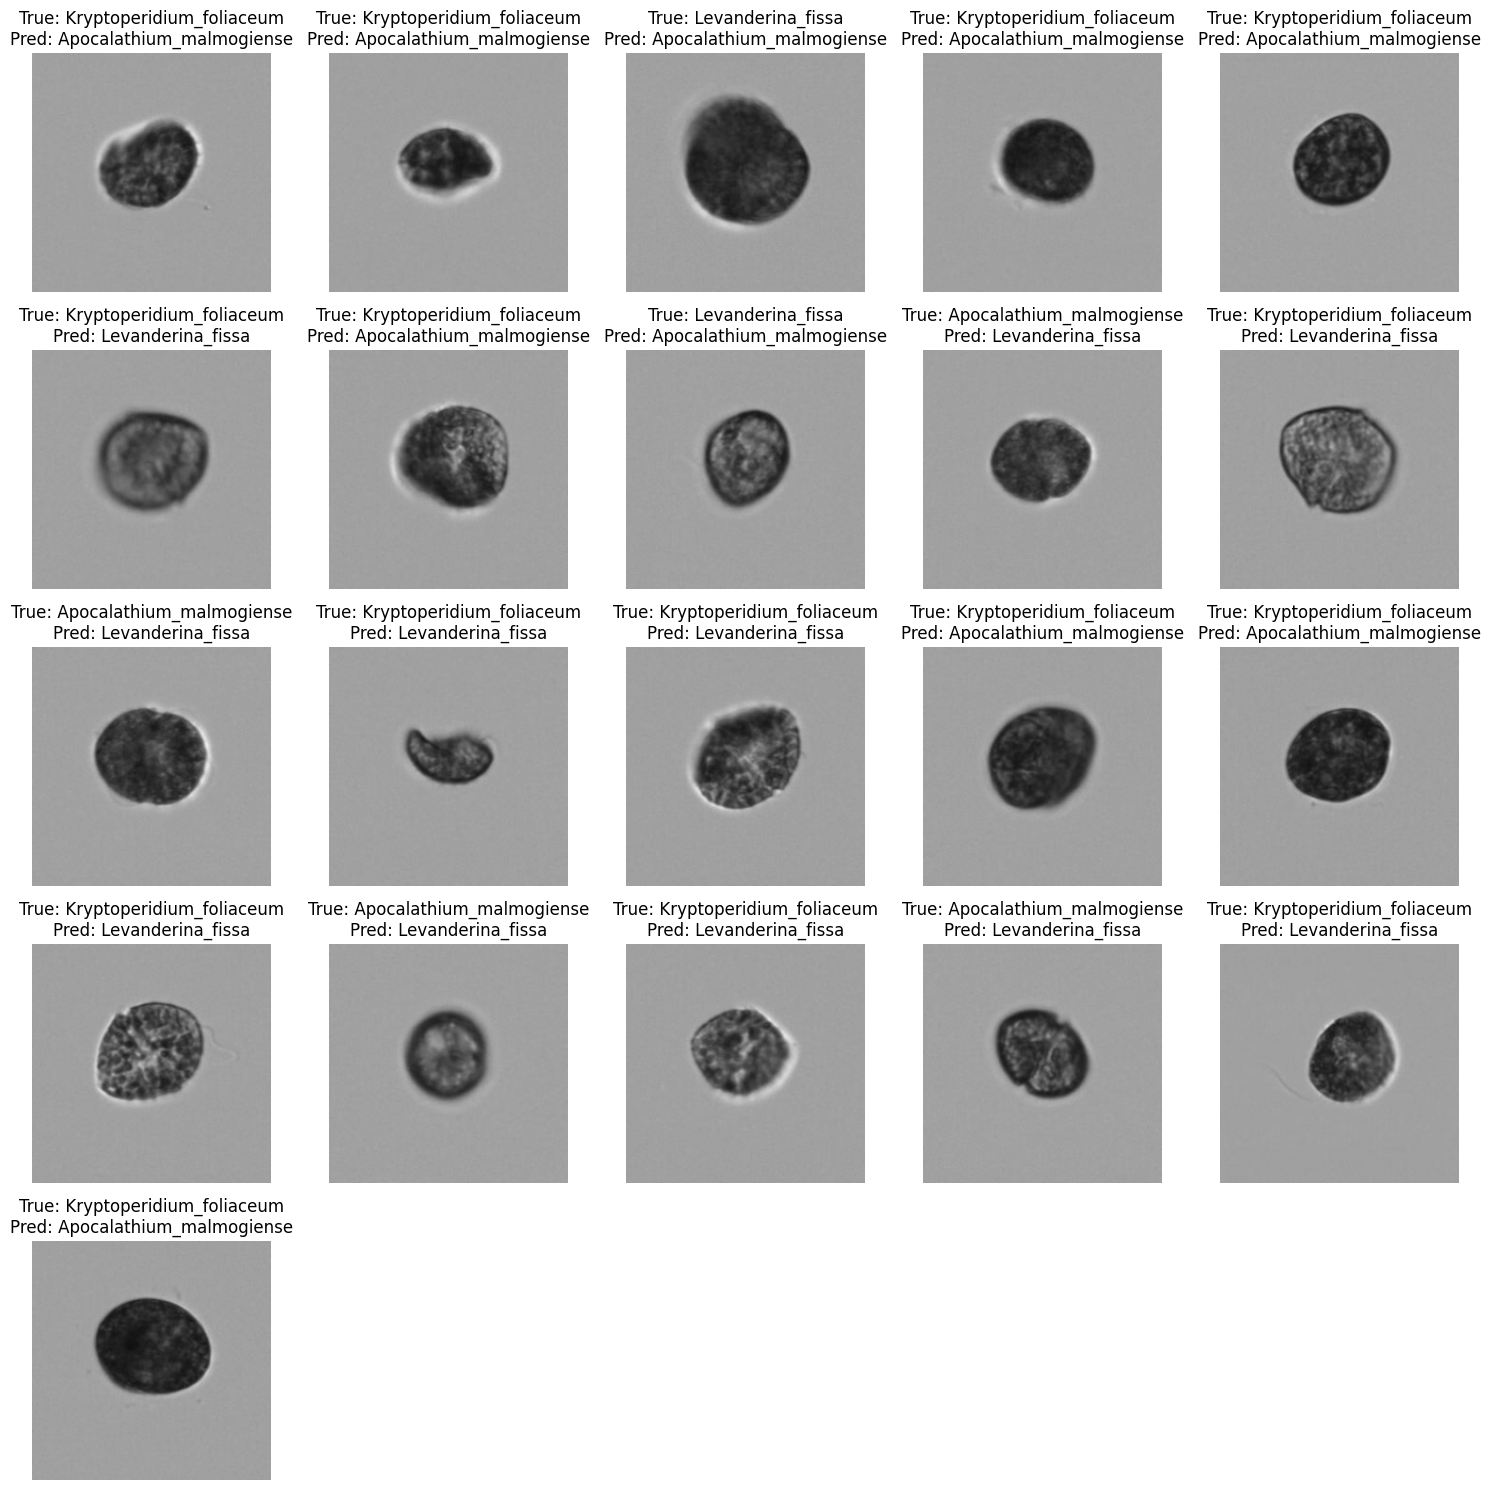

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to predict all images and plot misclassified images
def plot_misclassified_images(model, test_loader, device,class_names):
    model.eval()  # Set the model to evaluation mode

    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Find misclassified images
            misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in misclassified_idx:
                misclassified_images.append(images[idx].cpu())
                misclassified_labels.append(labels[idx].cpu())
                misclassified_preds.append(predicted[idx].cpu())

    # If there are misclassified images, plot them
    if misclassified_images:
        print("Total accuracy: "+str((1-len(misclassified_images)/len(test_loader.dataset))*100))
        num_misclassified = len(misclassified_images)
        num_cols = 5  # Number of columns in the subplot
        num_rows = (num_misclassified // num_cols) + (1 if num_misclassified % num_cols != 0 else 0)

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
        axes = axes.flatten()

        for i in range(num_misclassified):
            img = misclassified_images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy for plotting
            img = np.clip(img, 0, 1)  # Make sure values are in the [0, 1] range for visualization
            axes[i].imshow(img)
            axes[i].set_title(f"True: {class_names[misclassified_labels[i]]}\nPred: {class_names[misclassified_preds[i]]}")
            axes[i].axis('off')

        # Hide any empty subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No misclassified images!")
all_loader = DataLoader(dataset, batch_size=32, shuffle=False)
class_names = all_loader.dataset.classes
plot_misclassified_images(model, test_loader, device,class_names)

In [ ]:
## Calculating base line for the different imaging system dataset
data_dir2 = 'DAPlankton_subset\\FC'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Load dataset from folder structure
dataset = datasets.ImageFolder(root=data_dir2, transform=transform)
FC_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Predict the categories using the trained model
model.eval()  # Set the model to evaluation mode
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Find misclassified images
        misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
        for idx in misclassified_idx:
            misclassified_images.append(images[idx].cpu())
            misclassified_labels.append(labels[idx].cpu())
            misclassified_preds.append(predicted[idx].cpu())

# If there are misclassified images, plot them
if misclassified_images:
    print("Total accuracy: "+str((1-len(misclassified_images)/len(test_loader.dataset))*100))